<center><h1>Multiprocessing of Markov Chain Monte Carlo (Metropolis-Hastings) Parameter Estimation for Sky Temperature Model</h1></center>






<center><h3>By: Jorge Cárdenas</h3></center>

<center><h5>University of Antioquia, MSc in Physics</h5></center>


In [13]:
from mc_sim.imports import *
import mc_sim.models as models
import mc_sim.MCMC as MCMC
import mc_sim.multiproc as multiproc

import pylab as pl
%matplotlib inline


### ***1. Loading Data***
<a id='section1'></a>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">We have been provided with a dataframe, which has information about the behaviour of Sky signal temperature vs. the Frequency.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">We are going to use that information as the source of truth for parameter estimation during the execution of the Markov-Chain Monte Carlo algorithm</p>



In [14]:
test_to_run ="Results"#used to name saved data  


## **2. Parameter estimation assessment**



<p style="font-family:verdana;color:#34495E;font-size:0.9em;">After running the Metropolis Hastings Algorithm, here we can analyze data and plot results.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">You can accesss previous results by opening CSV files, located in results folder which includes the parallelized Metropolis output.</p>



In [15]:
#CSV file name with the parallelized Metropolis outpu
sec="551/55134ea56dcfcec3"

total_stack= pd.read_csv(test_to_run+'/'+str(sec)+'.csv') 
total_stack

,iteration,walker,accepted,likelihood,b0,b1,b2,b3,Te
0,0.0,0.0,0.0,-2.873535e+08,1698.230253,-0.083308,-0.007849,-0.001292,503.695616
1,1.0,1.0,0.0,-2.153074e+08,1733.857103,-0.089411,-0.021883,-0.015860,520.186916
2,3.0,0.0,1.0,-2.496444e+08,1775.392759,-0.084230,-0.007902,-0.001121,503.147242
3,4.0,1.0,0.0,-3.102395e+08,1733.857103,-0.089411,-0.021883,-0.015860,520.186916
4,6.0,0.0,0.0,-2.846690e+07,1731.890515,-0.082599,-0.008028,-0.000976,487.658684
...,...,...,...,...,...,...,...,...,...
55023,149935.0,1.0,0.0,-1.715708e+04,1758.803246,-0.083010,-0.035332,0.007245,571.663392
55024,149956.0,1.0,0.0,-1.650446e+04,1758.803246,-0.083010,-0.035332,0.007245,571.663392
55025,149968.0,1.0,0.0,-1.620821e+04,1758.803246,-0.083010,-0.035332,0.007245,571.663392
55026,149989.0,1.0,0.0,-1.501615e+04,1758.803246,-0.083010,-0.035332,0.007245,571.663392


##### ***2.1.1 Estimated values***


In [16]:
"""Mean values"""
print(total_stack.describe().loc[['mean']][["b0", "b1", "b2", "b3", "Te"]])
estimator=np.median(total_stack,axis=0)

"""Median Values"""
print("median:"+str(estimator[4:]))

               b0        b1        b2        b3          Te
mean  1758.332975 -0.081652 -0.020423  0.007082  568.737996
median:[ 1.75880325e+03 -8.26641524e-02 -1.47494128e-02  7.24530812e-03
  5.74334866e+02]


#### ***2.2 Saving Results***

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Here we save data from MCMC. There is a csv file with the whole information from every iteration.</p>
<p style="font-family:verdana;color:#34495E;font-size:0.9em;">You can see your results in the folder named by the <span style="font-weight:bold">test_to_run</span> variable</p>

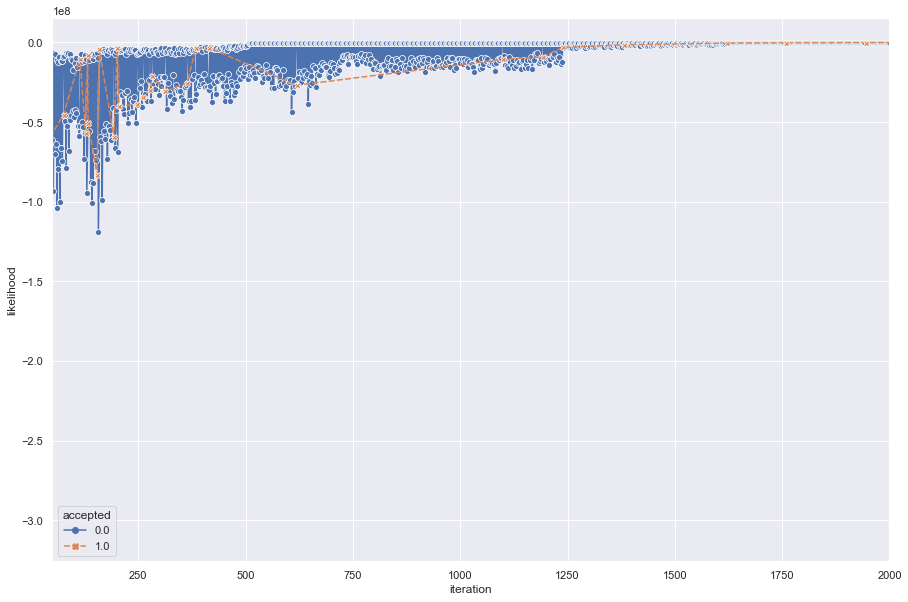

In [34]:
if not os.path.exists(test_to_run):
    os.makedirs(test_to_run)

    
sec2 = secrets.token_hex(nbytes=8)
sns.set_theme()


#plot = sns.relplot(
#    data=total_stack[["iteration","likelihood","walker","accepted"]],kind="line",
#    x="iteration", y="likelihood",
#    hue="accepted",facet_kws=dict(sharex=False),
#)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set(xlim=(50, 2000))

plot = sns.lineplot(x="iteration", y="likelihood", hue="accepted", style="accepted", markers=True, data=total_stack[["iteration","likelihood","walker","accepted"]])

"""Saving Results"""
plot.figure.savefig(test_to_run+"/"+str(sec)+"_dash.png") 
#total_stack.to_csv(test_to_run+"/"+str(sec)+'.csv', index=False)



## **3. Results**



<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Next step is to load data in order to analyze what we obtained from MCMC.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">The Chain,the one containing the distirbution information after M-H algorithm, needs to be cleaned.</p>
<p style="font-family:verdana;color:#34495E;font-size:0.9em;"><li>There is a need to drop the earliest part of the sampling process, because is the one far from convergence.</li>
<li>Thining of the chain, is the second process, and that is selecting just a part of the sampled data</li></p>


#### ***3.1 Distribution***

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Next, you can find the plots to show how the Markov Chain is presenting a distribution for every parameter. Also, there can be seen the correlation between every parameter.</p>

 <span style="color:red;" >Warning!: this can take long time to be processed</span>

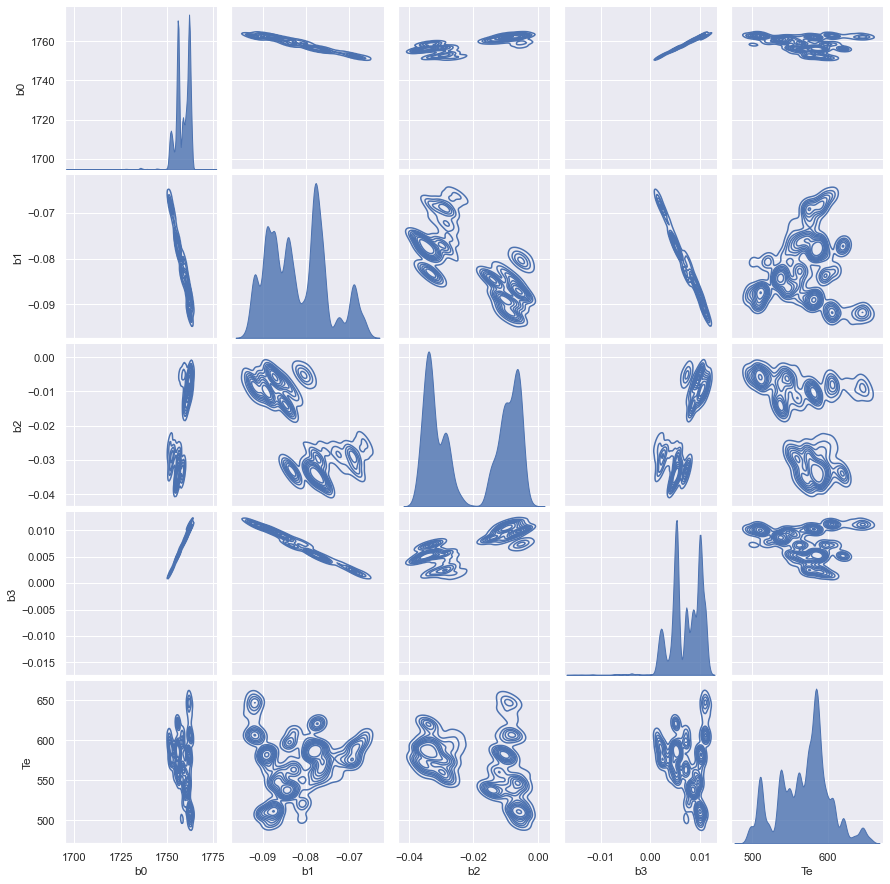

In [11]:

total_stack = total_stack[['b0',"b1","b2","b3","Te"]]

fig= sns.pairplot(total_stack, kind="kde",diag_kws = {'alpha':0.8})
fig.savefig(test_to_run+'/pair_plot_KDE_Test_551.png')


#### ***3.2 Parameters***

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Finally, We can show every parameter individually. There is a clear distribution and mean values for every one of them.</p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">As for the  <span style="color:red;" >b0</span>  parameter, we find there is always a peak around 1750-1750 </p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">The other parameter of big interest is  <span style="color:red;" >Te</span> . Though the effect of Te on the whole function, is precisely what we are looking for: account for the slightest contribution to sky brightness, so we can be more sure about the disturbances of inosphere on signals. </p>


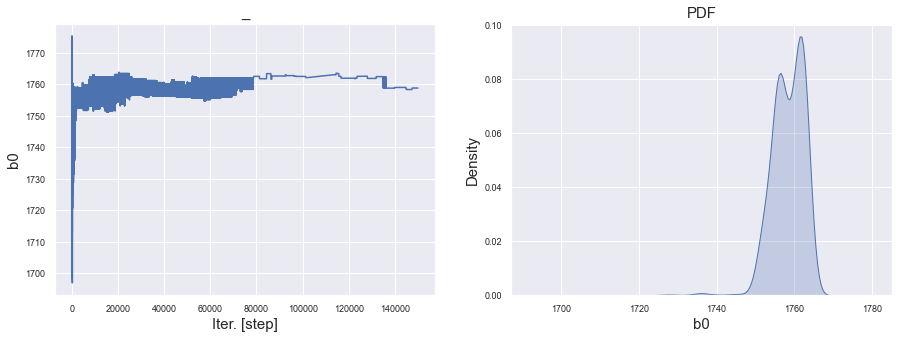

In [6]:
total_stack= pd.read_csv(test_to_run+'/'+str(sec)+'.csv') 

fig, ax =plt.subplots(1,2)
fig.set_size_inches(15, 5)


#plt.figure(figsize=(5,5))
data = sns.kdeplot(total_stack.b0,shade=True,bw_method=0.4)
iterations = sns.lineplot(data=total_stack[["b0","iteration"]], x="iteration",y="b0",sort=False,ax=ax[0])

iterations.axes.set_title("_",fontsize=15)
iterations.set_xlabel("Iter. [step]",fontsize=15)
iterations.set_ylabel("b0",fontsize=15)
iterations.tick_params(labelsize=9)

data.axes.set_title("PDF",fontsize=15)
data.set_xlabel("b0",fontsize=15)
data.set_ylabel("Density",fontsize=15)
data.tick_params(labelsize=9)

plt.show()

fig.savefig(test_to_run+'/distb0_0cc36e2a91c1e933.png')

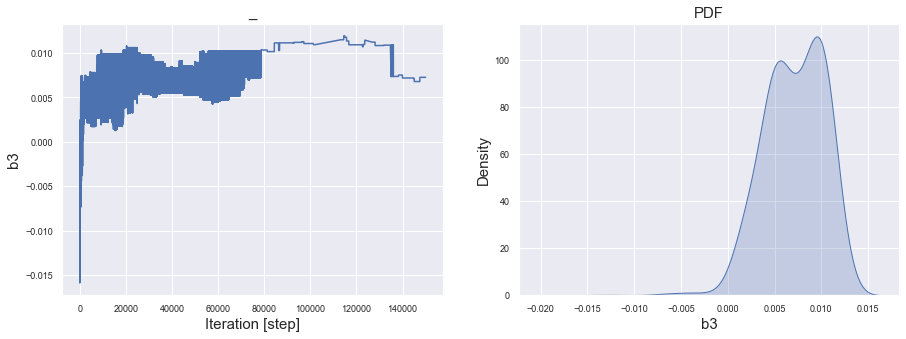

In [7]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15, 5)


#plt.figure(figsize=(5,5))
data = sns.kdeplot(total_stack.b3,shade=True,bw_method=0.5)
iterations = sns.lineplot(data=total_stack[["b3","iteration"]], x="iteration",y="b3",sort=False,ax=ax[0])

iterations.axes.set_title("_",fontsize=15)
iterations.set_xlabel("Iteration [step]",fontsize=15)
iterations.set_ylabel("b3",fontsize=15)
iterations.tick_params(labelsize=9)

data.axes.set_title("PDF",fontsize=15)
data.set_xlabel("b3",fontsize=15)
data.set_ylabel("Density",fontsize=15)
data.tick_params(labelsize=9)

plt.show()
fig.savefig(test_to_run+'/distb3_.png')

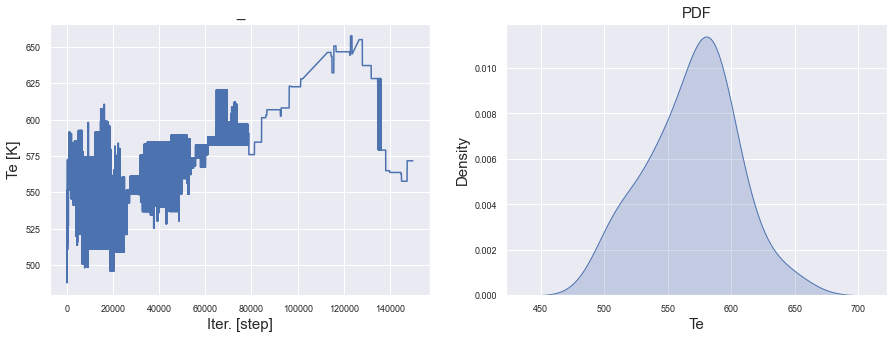

In [8]:

fig, ax =plt.subplots(1,2)
fig.set_size_inches(15, 5)


#plt.figure(figsize=(5,5))
data = sns.kdeplot(total_stack.Te,shade=True,bw_method=0.5)
iterations = sns.lineplot(data=total_stack[["Te","iteration"]], x="iteration",y="Te",sort=False,ax=ax[0])

iterations.axes.set_title("_",fontsize=15)
iterations.set_xlabel("Iter. [step]",fontsize=15)
iterations.set_ylabel("Te [K]",fontsize=15)
iterations.tick_params(labelsize=9)

data.axes.set_title("PDF",fontsize=15)
data.set_xlabel("Te",fontsize=15)
data.set_ylabel("Density",fontsize=15)
data.tick_params(labelsize=9)

plt.show()
fig.savefig(test_to_run+'/Te_0cc36e2a91c1e933.png')

#### ***4. Testing the parameters***

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">Our final step is to test the parameters, using them to calculate the model in the given range of frequencies we are working on. </p>

<p style="font-family:verdana;color:#34495E;font-size:0.9em;">As you can see, there is an important fit between the simulated results from the parameters we have found and the curve given at the beginning. </p>

In [9]:
theta_test = total_stack.describe().loc[['mean']]
theta_test

,iteration,walker,accepted,likelihood,b0,b1,b2,b3,Te
mean,46758.578669,0.499727,0.001381,-298481.984357,1758.332975,-0.081652,-0.020423,0.007082,568.737996


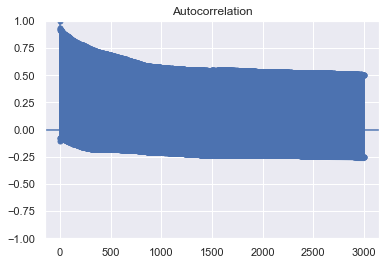

In [10]:

from matplotlib import pyplot
fig= plot_acf(total_stack.b0,lags=3000)
pyplot.show()
fig.savefig(test_to_run+'/autocorrelation_0cc36e2a91c1e933.png')

# **References**

[1] Bowman, J. D., Rogers, A. E. E., Monsalve, R. A., Mozdzen, T. J., & Mahesh, N. (2018). figure1_plotdata.csv

[2] Hills, R., Kulkarni, G., Meerburg, P. D., & Puchwein, E. (2018). Concerns about modelling of the EDGES data. Nature, 564(7736), E32–E34. https://doi.org/10.1038/s41586-018-0796-5

[3] Bowman, J. D., Rogers, A. E. E., Monsalve, R. A., Mozdzen, T. J., & Mahesh, N. (2018). An absorption profile centred at 78 megahertz in the sky-averaged spectrum. Nature, 555(7694), 67–70. https://doi.org/10.1038/nature25792

[4] Cowan, G. (1998). Statistical Data Analysis (1st ed.). Oxford University Press.

[5] Thomas, C. D. (2018). Concerns about modelling of the EDGES data. Nature, 1–2. https://doi.org/https://doi.org/10.1038/s41586-018-0796-5